## Study of  $D^0 \to K^- \pi^+ $ decay

- Mass
- Lifetime


<img src="http://lhcb-public.web.cern.ch/lhcb-public/en/LHCb-outreach/masterclasses/en/VertexD.png" width=60%>

http://lhcb-public.web.cern.ch/lhcb-public/en/LHCb-outreach/masterclasses/en/D0Lifetime.html

In [1]:
%%bash
pip install iminuit probfit seaborn cython

In [2]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import seaborn
import iminuit, probfit
from __future__ import print_function

In [3]:
%%bash
if [ ! -f MasterclassData_2012.npz ] ; then
  wget -O MasterclassData_2012.npz https://www.dropbox.com/s/6z1n003gxp4svn0/MasterClassData_2012.npz?dl=0
fi

In [4]:
datafile_2012 = 'MasterclassData_2012.npz'
#df = root_numpy.root2array(datafile_2012, treename='DecayTree')
fh = np.load(datafile_2012)

In [5]:
df = fh['df']

In [6]:
df.dtype

dtype([('D0_MM', '<f8'), ('D0_PT', '<f8'), ('D0_TAU', '<f8'), ('D0_MINIPCHI2', '<f8'), ('D0_DIRA_OWNPV', '<f8'), ('nPV', '<i4'), ('D0_MINIP', '<f8'), ('piminus_PT', '<f8'), ('piminus_ProbNNpi', '<f8'), ('piminus_ProbNNk', '<f8'), ('Kplus_PT', '<f8'), ('Kplus_ProbNNpi', '<f8'), ('Kplus_ProbNNk', '<f8')])

In [7]:
df.shape

(54352,)

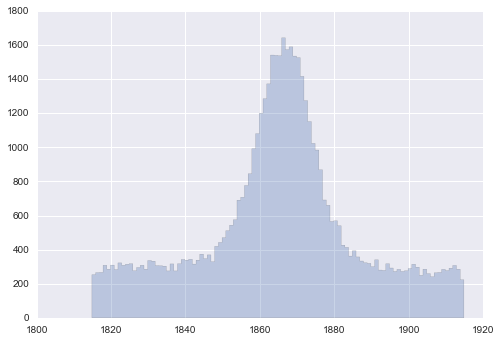

In [8]:
plt.hist(df['D0_MM'][df['D0_MINIP'] < 10], bins=100, histtype='stepfilled', alpha=0.3);

### D0 mass measurements

* Fitting the D0 mass
    - First plot the D0 mass distribution
    - Now fit to it. In this fit, leave the signal and mass ranges to their default values.
    - Define the signal mass region as +-3 sigma around the mean value
    - What is the signal significance

In [9]:
from iminuit import Minuit
from probfit import UnbinnedLH, gaussian, linear

In [10]:
fit_range = (1830, 1900)
normalized_poly = probfit.Normalized(probfit.Polynomial(1), fit_range)
normalized_poly = probfit.Extended(normalized_poly, extname='NBkg')

gauss1 = probfit.Extended(probfit.rename(probfit.gaussian, ['x', 'mu1', 'sigma1']), 
                          extname='N1')

# Define an extended PDF consisting of three components
pdf = probfit.AddPdf(normalized_poly, gauss1)

print('normalized_poly: {}'.format(probfit.describe(normalized_poly)))
print('gauss1:          {}'.format(probfit.describe(gauss1)))
print('pdf:             {}'.format(probfit.describe(pdf)))

normalized_poly: ['x', 'c_0', 'c_1', 'NBkg']
gauss1:          ['x', 'mu1', 'sigma1', 'N1']
pdf:             ['x', 'c_0', 'c_1', 'NBkg', 'mu1', 'sigma1', 'N1']


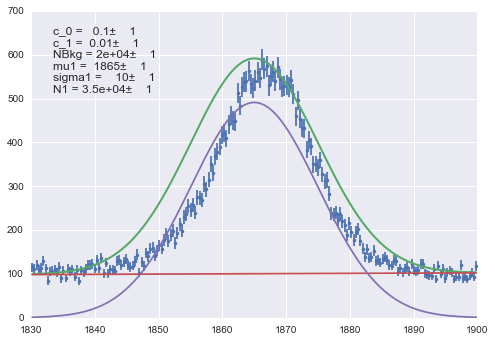

In [11]:
binned_likelihood = probfit.BinnedLH(pdf, df['D0_MM'], bins=200, extended=True, bound=fit_range)

# This is a quite complex fit (11 free parameters!), so we need good starting values.
# Actually we even need to set an initial parameter error
# for 'mu1' and 'mu2' to make MIGRAD converge.
# The initial parameter error is used as the initial step size in the minimization.
pars = dict(mu1=1865, sigma1=10, N1=35000,
            c_0=0.1, c_1=0.01, NBkg=20000)
minuit = iminuit.Minuit(binned_likelihood, pedantic=False, print_level=0, **pars)
# You can see that the model already roughly matches the data
binned_likelihood.draw(minuit, parts=True);

In [12]:
minuit.migrad();
#minuit.minos();

/Users/anaderi/miniconda/envs/opera/lib/python2.7/site-packages/ipykernel/__main__.py:1: SmallIntegralWarning: (0.1, -0.0168119242616879)
  if __name__ == '__main__':


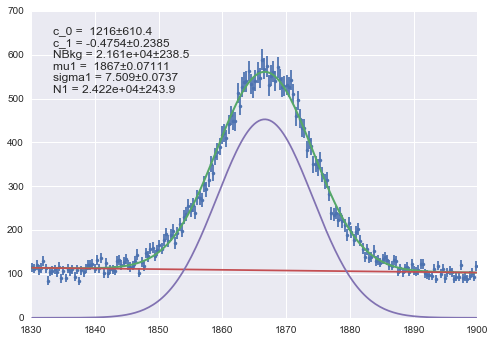

FCN = 102.528758036 
 TOTAL NCALL = 253 
 NCALLS = 253 
 
 
 EDM = 5.41771115041e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c_0,1215.94,610.387,0,0,,,
2,c_1,-0.475408,0.238528,0,0,,,
3,NBkg,21612.4,238.453,0,0,,,
4,mu1,1866.65,0.0711126,0,0,,,
5,sigma1,7.50915,0.0737035,0,0,,,
6,N1,24223.6,243.881,0,0,,,


+,c_0,c_1,NBkg,mu1,sigma1,N1
c_0,1.00,-0.99,0.01,-0.02,-0.00,-0.01
c_1,-0.99,1.00,0.01,-0.02,-0.00,-0.01
NBkg,0.01,0.01,1.00,0.00,-0.54,-0.61
mu1,-0.02,-0.02,0.00,1.00,-0.02,-0.00
sigma1,-0.00,-0.00,-0.54,-0.02,1.00,0.53
N1,-0.01,-0.01,-0.61,-0.00,0.53,1.00


In [13]:
binned_likelihood.show(minuit, parts=True);
minuit.print_fmin()
minuit.print_matrix()

In [14]:
print ("D0 mass:", minuit.values['mu1'], "+/-", minuit.errors['mu1'])

D0 mass: 1866.65112926 +/- 0.0711126213697


## D0 lifetime measurement

Welcome to the LHCb masterclass exercise on measuring the lifetime of the D0 meson. 
The goal of this exercise is to measure the lifetime of the D0 meson, a fundamental
particle made of a charm quark and an up anti-quark. In order to do so, you will
first learn how to separate signal D0 mesons from backgrounds. Finally, you will
compare your results to the values found by the Particle Data Group (http://pdgLive.lbl.gov).

#### Step-by-step instructions :

3. Plot the variable distributions. You will see three further plots appearing, and
in each one the blue points represent the distribution of the signal in that variable
while the red points represent the distribution of the background. The plot is logarithmic
in the Y axis, and each point represents the fraction of the total signal in that bin.
Which regions of each variable contain mostly signal? Which contain mostly background?
4. Fit the lifetime distribution. Save the results
of your fit and compare them to the PDG value. Do they agree?
5. Repeat step 4 but now varying the upper D0 log(IP) variable range
from 1.5 to -2 in steps of 0.2. Do you notice a pattern?
6. Does the D0 lifetime with an log(IP) cut of
-1.5 agree better or worse with the PDG than the lifetime with an log(IP) cut of 1.5?;

## Lifetime

Exponential decay:

$$\frac{dN}{dt} = -\lambda N$$

or 

$$\frac{dN}{N} = -\lambda dt$$

integrating:

$$\mathrm{ln} N = - \lambda t + C$$

Mean lifetime (https://en.wikipedia.org/wiki/Exponential_decay):

$$ \tau = <t> = \frac{1}{\lambda} $$



### Variables distribution

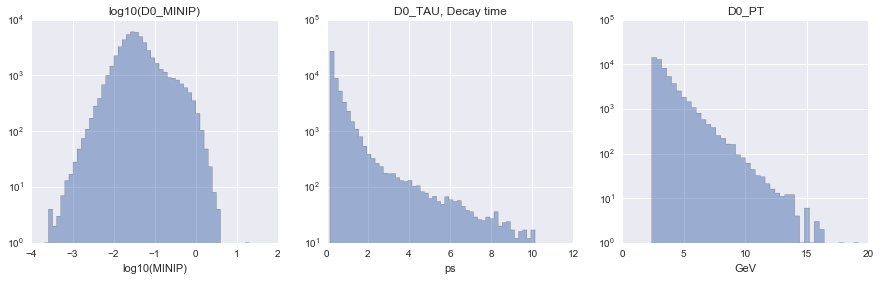

In [15]:
plt.figure(figsize=(15, 4));
plt.subplot(1,3,1)
plt.hist(np.log10(df['D0_MINIP']), bins=50, histtype='stepfilled', alpha=0.5);
plt.yscale('log')
plt.title('log10(D0_MINIP)')
plt.xlabel('log10(MINIP)')

plt.subplot(1,3,2)
plt.hist(df['D0_TAU']*1000, bins=50, histtype='stepfilled', alpha=0.5)
plt.yscale('log')
plt.xlabel('ps')
plt.title('D0_TAU, Decay time')

plt.subplot(1,3,3)
plt.hist(df['D0_PT']/1000, bins=50, histtype='stepfilled', alpha=0.5, range=(0, 20));
plt.xlabel('GeV')
plt.yscale('log')
plt.title('D0_PT')



## Background substraction

idea: 

1. We are interested in signal/background sample distribution (not individual events) wrt variable TAU.
2. Check that variable MM is not correlated with TAU.
3. For the whole sample define signal region R_s wrt mass variable (MM), i.e. interval with majority of signal. It splits whole data sample into 2 subsamples: "signal region events" and "sideband region events".
4. Since TAU and MM are not correlated, distribution of a variable TAU for background to be the distribution of _sideband_ events. 
5. To plot normalized distribution of signal wrt variable TAU, one have to substract histogram  of background events (4) from histogram of _signal region_ events.


In [16]:
signal_region = (1844, 1890)

### Checking correlation between MM & TAU


In [17]:
np.cov(df['D0_MM'],df['D0_TAU'])

array([[  4.71603887e+02,   2.20971762e-04],
       [  2.20971762e-04,   1.15501796e-06]])

In [18]:
np.cov(df['D0_MM'],df['D0_PT'])

array([[  4.71603887e+02,   6.23003892e+02],
       [  6.23003892e+02,   1.81859443e+06]])

In [19]:
np.cov(df['D0_MM'],df['D0_MINIP'])

array([[  4.71603887e+02,   7.58660110e-03],
       [  7.58660110e-03,   3.91780238e-02]])

In [20]:
signal_region_mask = df['D0_MM'] >= signal_region[0]
signal_region_mask &= df['D0_MM'] < signal_region[1]

In [21]:
signal_region_events = df['D0_TAU'][signal_region_mask]

In [22]:
sideband_region_mask = signal_region_mask == False

In [23]:
sideband_region_events = df['D0_TAU'][sideband_region_mask]

In [24]:
back_scaling_factor = float(signal_region_events.shape[0]) / sideband_region_events.shape[0]

In [25]:
back_scaling_factor

2.4194400754954386

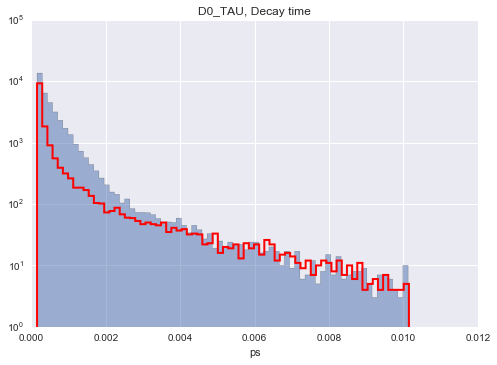

In [26]:
n_bins = 72
h_sr, bar_x, _ = plt.hist(signal_region_events, bins=n_bins, histtype='stepfilled', alpha=0.5)
h_sb, _, _ = plt.hist(sideband_region_events, bins=n_bins, histtype='step', alpha=1., lw=2, color='r')
h_sig = h_sr - h_sb / back_scaling_factor
#plt.bar(bar_x, h_sig)
plt.yscale('log')
plt.xlabel('ps')
plt.title('D0_TAU, Decay time')

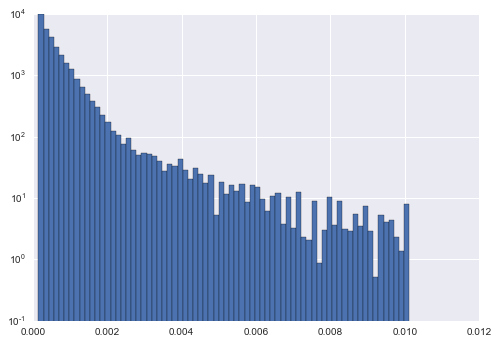

In [27]:
plt.bar(bar_x[:-1], h_sig, width=bar_x[1] - bar_x[0])
plt.yscale('log')

In [28]:
def line(x, m, c): # define it to be parabolic or whatever you like
    return m * x + c
err = np.maximum(np.nan_to_num(np.log(h_sig + np.sqrt(h_sig)) - np.log(h_sig)), 0.01)
#err = np.ones(len(h_sig))
chi2 = probfit.Chi2Regression(line, (bar_x[:1] + bar_x[1:])/2*1000, np.log(h_sig), err)

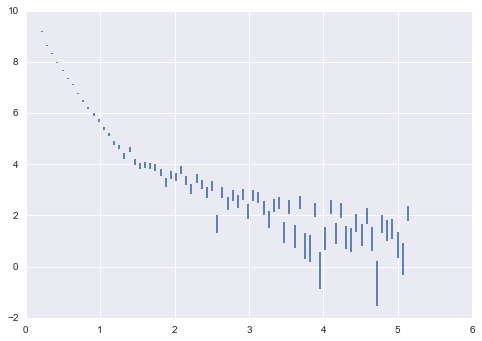

In [29]:
plt.errorbar((bar_x[:1] + bar_x[1:])/2*1000, np.log(h_sig), yerr=err, fmt='none');

In [30]:
minuit = iminuit.Minuit(chi2, m=-1, c=10, limit_m=(-5,0), error_m=0.01, error_c=0.1) # see iminuit tutorial on how to give initial value/range/error
minuit.migrad();

FCN = 9757.4604944 
 TOTAL NCALL = 44 
 NCALLS = 44 
 
 
 EDM = 4.78939875441e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,-2.69627,0.011926,0,0,-5.0,0.0,
2,c,9.31359,0.00788456,0,0,,,


D^{0} lifetime 0.3709 #pm 0.001640 (ps)


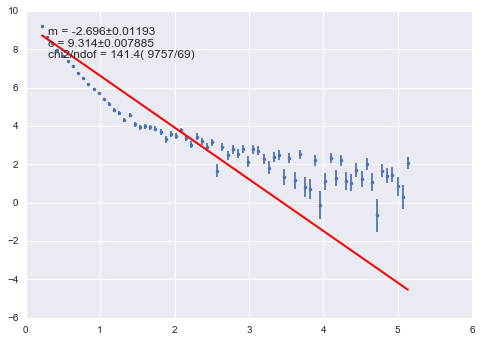

In [31]:
chi2.draw(minuit)
print ("D^{0} lifetime %.4f #pm %.6f (ps)" % 
  (-1./minuit.values["m"], minuit.errors["m"]/(minuit.values["m"]**2)))

## Tasks
* MINIP dependence
    - Repeat the previous step for different values of MINIP, as described in the instructions
      included in the executable.
    - At each step save the fit result.
    - Plot the trend of fit results vs. MINIP.

In [32]:
# TODO


## Quiz

* Does the Gaussian fit the mass distribution well?
    - Explain the reason why in the fits where there is less background, the Gaussian undershoots the data points on the left.
    - Discuss radiative photon emission and mass bias.
* Why does the original lifetime fit not agree with the PDG value?
* Why does cutting on MINIP help, but cutting on D0 PT or TAU not help?
* How would you estimate the systematic uncertainty on the measurement from the trend plot?

In [33]:
# Your answers go below